In [139]:
# The import is required for GeoIOVolume module
from geoio.geoio import GeoIoVolume
from geoio.geoio_project import GeoIoProjectManager
from geoio.geoio import GeoIoVolume, GeoIoHorizonCollection

# These are general imports and are only needed if using this functionality
import numpy as np
import matplotlib.pyplot as plt
import os
import random

In [140]:
def plot_slice1(data1, data2, title=''):
    gs = plt.GridSpec(1, 2)
    
    fig = plt.figure(figsize=(15, 12))
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])
    
    data1 = (data1 - np.min(data1))/np.ptp(data1)
    data2 = (data2 - np.min(data2))/np.ptp(data2)

    # Plot the section
    mesh1 = ax1.imshow(data1.T, cmap='seismic')
    mesh2 = ax2.imshow(data2.T, cmap='seismic')

    mesh1.set_clim(0,1)
    mesh2.set_clim(0,1)
    ax1.set(title='fasttrack')
    ax2.set(title='full_processed')
    plt.show()

In [141]:
def plot_slice2(data1, data2, title=''):
    gs = plt.GridSpec(1, 2)
    
    fig = plt.figure(figsize=(15, 15))
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])
    
    data1 = (data1 - np.min(data1))/np.ptp(data1)
    data2 = (data2 - np.min(data2))/np.ptp(data2)

    # Plot the section
    mesh1 = ax1.imshow(data1.T, cmap='seismic')
    mesh2 = ax2.imshow(data2.T, cmap='seismic')
   
    mesh1.set_clim(0,1)
    mesh2.set_clim(0,1)
    ax1.set(title='fasttrack')
    ax2.set(title='full_processed')
    plt.show()

In [142]:
# Define a function to take attributes of an object without the builtin attributes
def vdir(obj):
    return [x for x in dir(obj) if not x.startswith('__')]

In [143]:
vt = GeoIoVolume('/glb/hou/pt.sgs/data/ml_ai_us/4d/usadh7/data/lula_monitor_raw.vt')

In [144]:
# Read in all the samples
cube1 = vt.get_float()
print('cube.shape:', cube1.shape)
print('type(data):', type(cube1))

cube1.dtype

cube.shape: (550, 617, 1601)
type(data): <class 'numpy.ndarray'>


dtype('float32')

In [145]:

vt = GeoIoVolume('/glb/hou/pt.sgs/data/ml_ai_us/4d/usadh7/data/lula_baseline_raw.vt')

In [146]:
# Read in all the samples
cube2 = vt.get_float()
print('cube.shape:', cube2.shape)
print('type(data):', type(cube2))
cube2.dtype

cube.shape: (550, 617, 1601)
type(data): <class 'numpy.ndarray'>


dtype('float32')

In [147]:
vt = GeoIoVolume('/glb/hou/pt.sgs/data/ml_ai_us/4d/usadh7/data/n0w.cz_monitor.vt')

In [148]:
# Read in all the samples
cube2 = vt.get_float()
print('cube.shape:', cube2.shape)
print('type(data):', type(cube2))
cube2.dtype

cube.shape: (550, 617, 1601)
type(data): <class 'numpy.ndarray'>


dtype('float32')

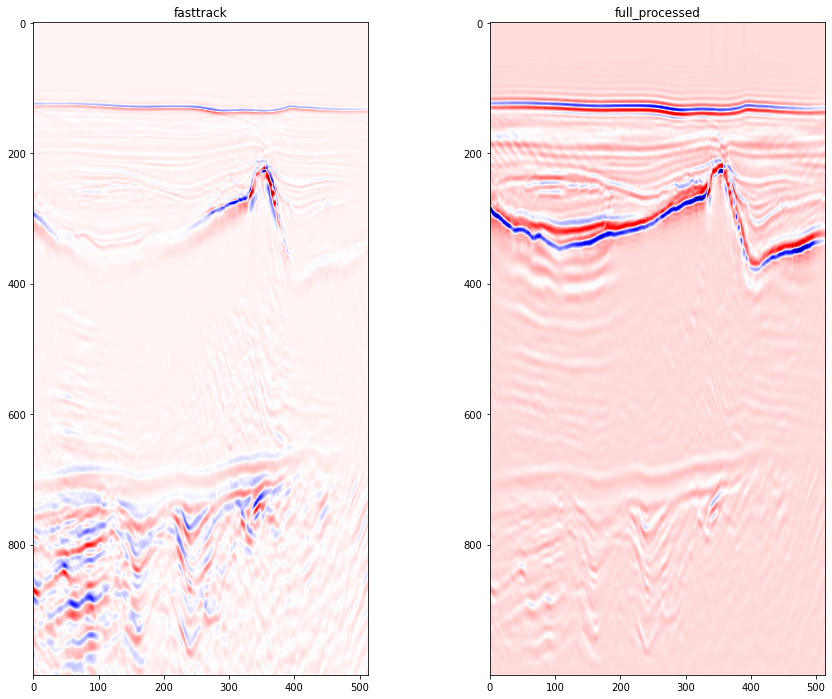

In [149]:
plot_slice1(cube1[19:533,10,300:1300],cube2[19:533,10,300:1300],'Otu-I-Slice')

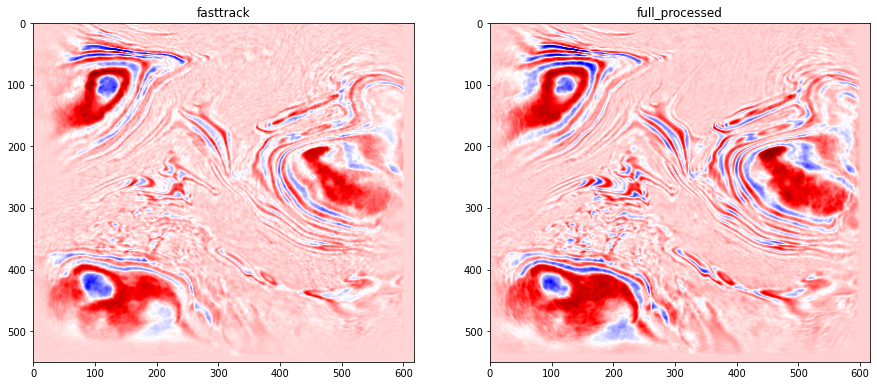

In [156]:
plot_slice2(cube1[:,:,899].T,cube2[:,:,899].T,'Otu-I-Slice')

In [11]:
plot_slice(cube1[19:533,1,300:1300],cube2[19:533,1,300:1300],'Otu-I-Slice')

NameError: name 'plot_slice' is not defined

In [ ]:
np.shape(cube1[18:530,:,300:1324])

In [ ]:
os.system('rm -rf ./datasets/seismic/train')
os.system('rm -rf ./datasets/seismic/test')
os.system('rm -rf ./datasets/seismic/val')
os.system('mkdir ./datasets/seismic/train')
os.system('mkdir ./datasets/seismic/test')
os.system('mkdir ./datasets/seismic/val')
n1 = 0;
n2 = 0;
n3 = 0;
for i in range(617):
    cubedata1 = cube1[19:533,i,300:1300]
    cubedata2 = cube2[19:533,i,300:1300]
    cubedata1 = (cubedata1 - np.min(cubedata1))/np.ptp(cubedata1)
    cubedata2 = (cubedata2 - np.min(cubedata2))/np.ptp(cubedata2)
    cubedata1 = cubedata1.T
    cubedata2 = cubedata2.T
    fcube = np.concatenate((cubedata1,cubedata2),axis=1)
    if (random.random() < 0.7):
        np.save('./datasets/seismic/train/'+str(n1),fcube)
        n1=n1+1
    elif (random.random() < 0.85):
        np.save('./datasets/seismic/test/'+str(n2),fcube)
        n2=n2+1
    else:
        np.save('./datasets/seismic/val/'+str(n3),fcube)
        n3=n3+1

In [ ]:
import random

random.random()

In [ ]:
po=np.load('./datasets/seismic/train/0.npy')
plt.imshow(po,cmap='seismic')

In [ ]:
import m8r
transform = m8r.put(o1=0,d1=0.004).timefreq(rect=50,dw=0.1,nw=101)
tf = transform.apply(c)

In [ ]:
header

In [ ]:
check